In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
#Libraries related to plots 
import matplotlib.pyplot as plt 
from matplotlib import rcParams 
import seaborn as sns

#sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
#importing heart.csv(dataset) into a dataframe
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Analysing details of the columns of the heart dataframe
heart_data.info()
heart_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We notice that there are NO missing or NULL values so the dataset appears to be clean and tidy.


In [4]:
#To get an understanding of the columns specified in the heart disease dataset

heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Below is the description of the columns

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

In [5]:
#Trying to understand the data by using describe function 
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**What Analysis we take from the descibe function of the data ?**  
1.Minimum Age is 29 and Maximum age is 77 and the average being 54.It makes sense as we occurence of heart disease is generally more prominent after age 25-30 .Also it shows that there is balanced Normal distribution with mean and 50% inter quartile range of age.  
2.The mean of the sex column is 0.68 stating they are more male records that female in the dataset with ratio 68:32 (male:female)  
3.The statistics of chest pain is hard to analyse from the displayed information  as it is multi-categorical.But by mean value we can predict that most of them come under typical and atypical angina.  
4.Person's resting blood pressure minimum value is 94 Maximum value :200 where 75% of the data falls below 140 indicating there could be some outliers  
5.Person's cholestrol level minimum value is 125 Maximum value :564 where 75% of the data falls below 274 indicating there could be some outliers  
6.Target columns has mean  0.54 which states that target values are in ratio 1:1 (Heart Disease No :Yes)


## Visualizing Target Count in the Heart Data

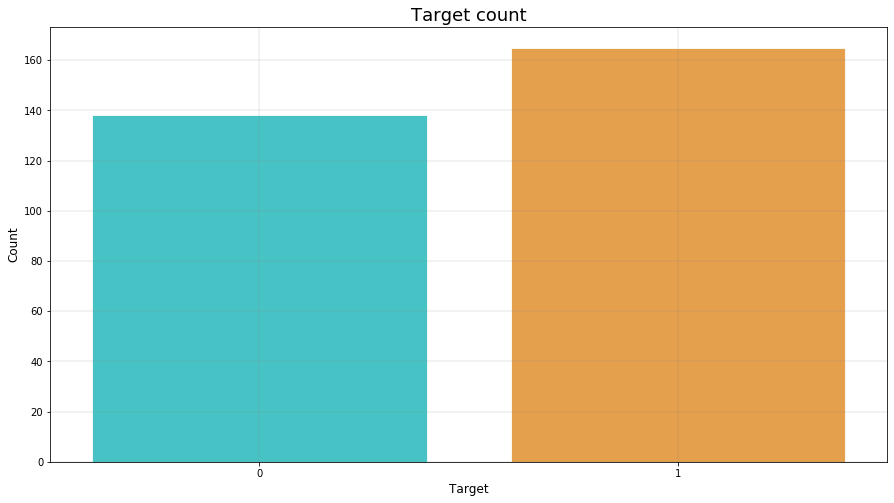

Percentage Haven't Heart Disease: 45.54%
Percentage Have Heart Disease: 54.46%


In [6]:
colors = ['darkturquoise', 'darkorange']
#plt.style.use('dark_background')
plt.rcParams['figure.figsize']=(15,8)

#tc: Target Count
tc = sns.countplot(x='target',data=heart_data,palette=colors,alpha=0.8,edgecolor='white')
tc.set_xlabel('Target',fontsize =12)
tc.set_ylabel('Count',fontsize = 12)
tc.grid(b=True, which='major', color='grey', linewidth=0.2)
plt.title('Target count', fontsize=18)
plt.show()

target_No = len(heart_data[heart_data.target == 0])
target_Yes = len(heart_data[heart_data.target == 1])
print("Percentage Haven't Heart Disease: {:.2f}%".format((target_No / (len(heart_data.target))*100)))
print("Percentage Have Heart Disease: {:.2f}%".format((target_Yes / (len(heart_data.target))*100)))


###### As already stated from the MEAN the dataset has approx equal number  of postive and Negative records 

## Visualizing Target Count in the Heart Data

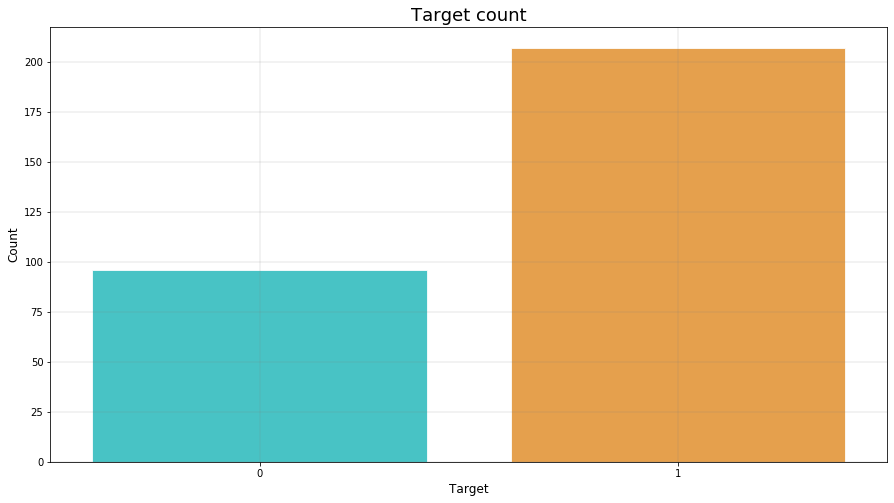

Percentage of Male: 68.32%
Percentage of female: 31.68%


In [7]:
#tc: Sex Count
tc = sns.countplot(x='sex',data=heart_data,palette=colors,alpha=0.8,edgecolor='white')
tc.set_xlabel('Target',fontsize =12)
tc.set_ylabel('Count',fontsize = 12)
tc.grid(b=True, which='major', color='grey', linewidth=0.2)
plt.title('Target count', fontsize=18)
plt.show()

target_Female = len(heart_data[heart_data.sex == 0])
target_Male = len(heart_data[heart_data.sex == 1])
print("Percentage of Male: {:.2f}%".format((target_Male / (len(heart_data.sex))*100)))
print("Percentage of female: {:.2f}%".format((target_Female / (len(heart_data.sex))*100)))

## Analysing Categorical Data

The categorical columns is the dataset are Sex,Chest Pain, fasting blood sugar,Resting electrocardiographic measurement,thalassemia,Slope, Exercise induced angina 

Lets plot between categorical variables verses the target to understand the relationship between categories of indepedent variables  and target variables

In [8]:
#Defining Generic function to plot between independent variable verses the Target Variable
def CountPlot(Column):
    #Count Column Normalizing to convert the value count into percentage value 1 multiplying by 100
    cc = heart_data.groupby('target')[Column].value_counts(normalize=True).mul(100).reset_index(name = 'percentage')
    sns.barplot(x = "target", y = "percentage", hue = Column,data = cc)
    
    

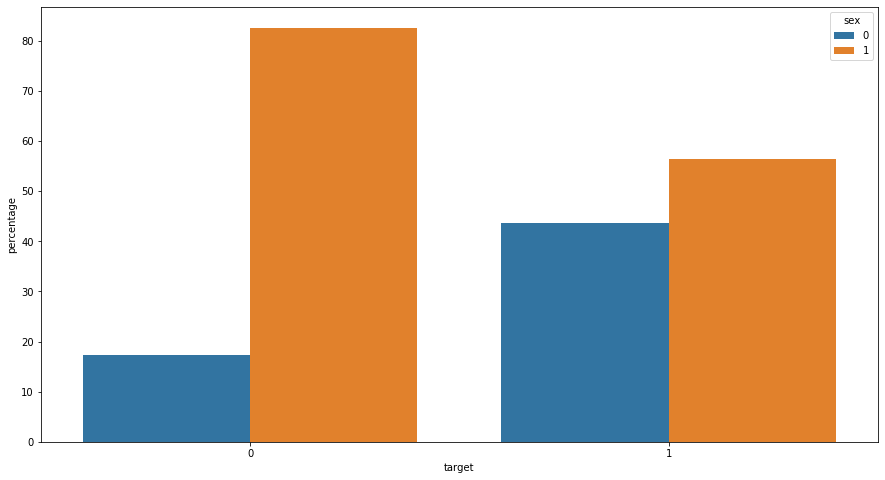

In [9]:
CountPlot('sex')

**Insights:**  
cant really make anything from the graph
Eventhough male seems more effected to heart disease than female the percentage of male records are significantly more than that of female 
    

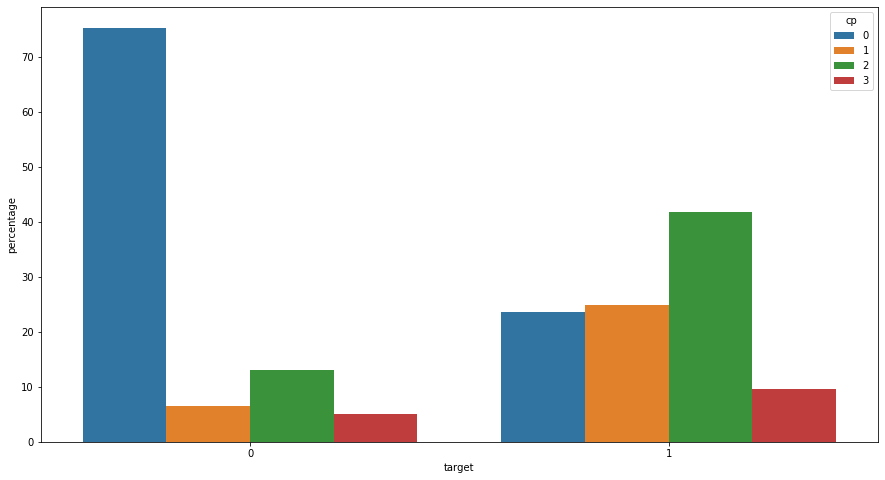

In [10]:
CountPlot('cp')

**Insights:**  
1.We can see that chest pain of type 2 (non-anginal pain) are more prone to Heart disease  
2.patients with chest pain of type 0 (typical angina ) are not as significantly  effected with heart disease as other cp types 



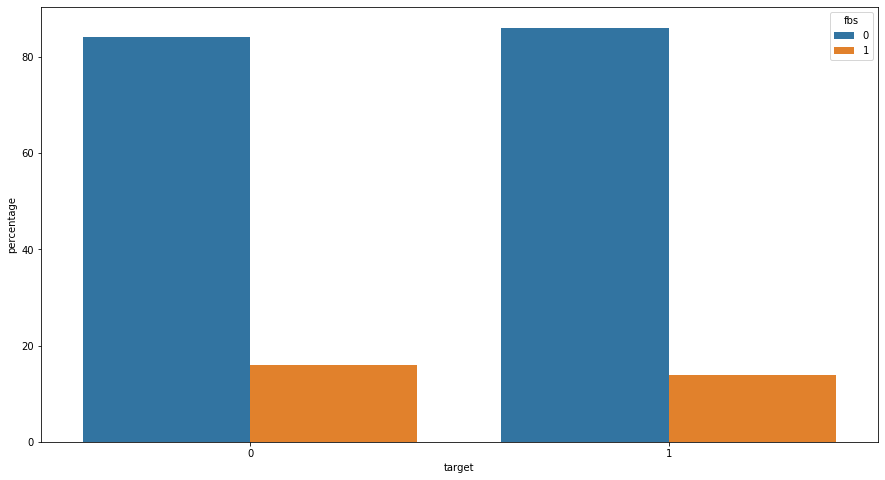

In [11]:
CountPlot('fbs')

**Insights:**  
1.The fbs feature doesn't differentiate between the targets(0,1).Hence this feature will not useful in predicting the heart disease

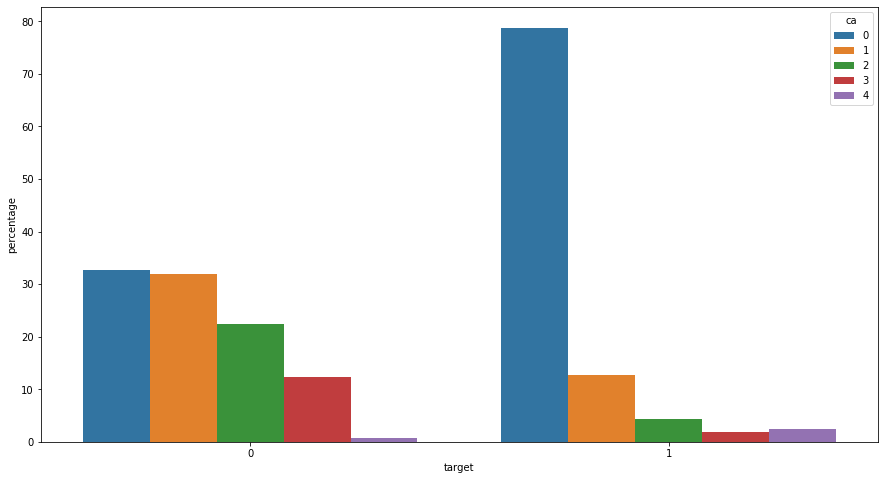

In [12]:
CountPlot('ca')

**Insights:**  
ca with type 1 are more to heart disease than other types

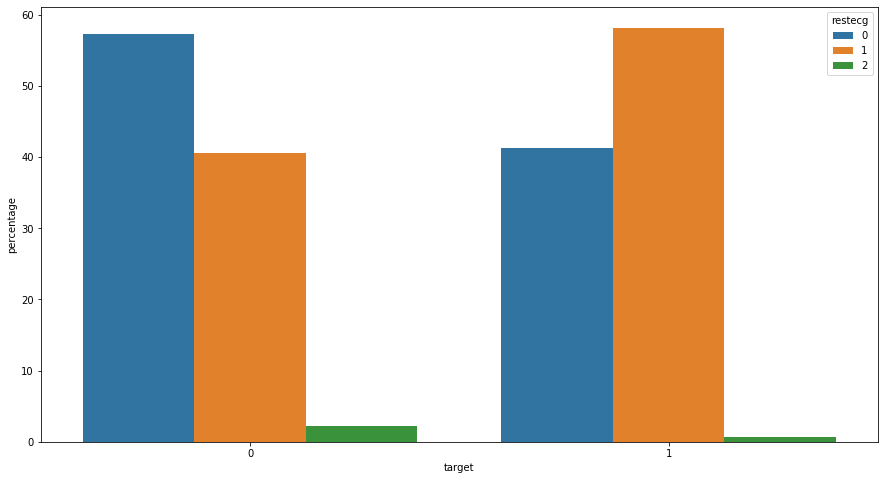

In [13]:
CountPlot('restecg')

**Insights:**  
The above plot is column bar chart representing target vs ECG Measurements(Electro Cardio Gram), The above plot shows that the more number of patients not likely to suffer from heart diseases are having restscg value 0 whereas more number of people have restecg value 1 in case of more likelihood of suffering from a heart disease.patients restecg of type 1 are most prone to heart disease

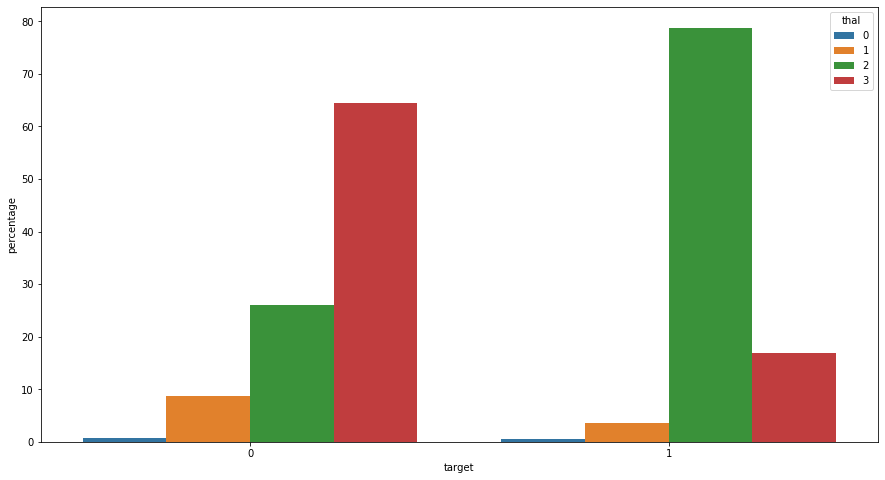

In [14]:
CountPlot('thal')

**Insights:**  
1.patients with thal type 2  are more to heart disease  
2.patients with thal type 3 are least effected by heart disease

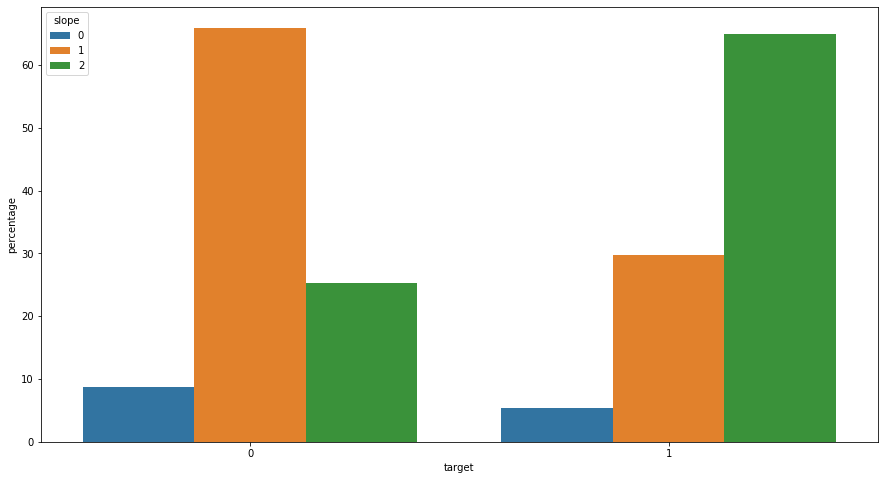

In [15]:
CountPlot('slope')

**Insights:**  
1.Patients with slope of type 2 are most prone to heart disease  
2.patients with slope of type 1 are least effected to heart disease when compared to other slope types

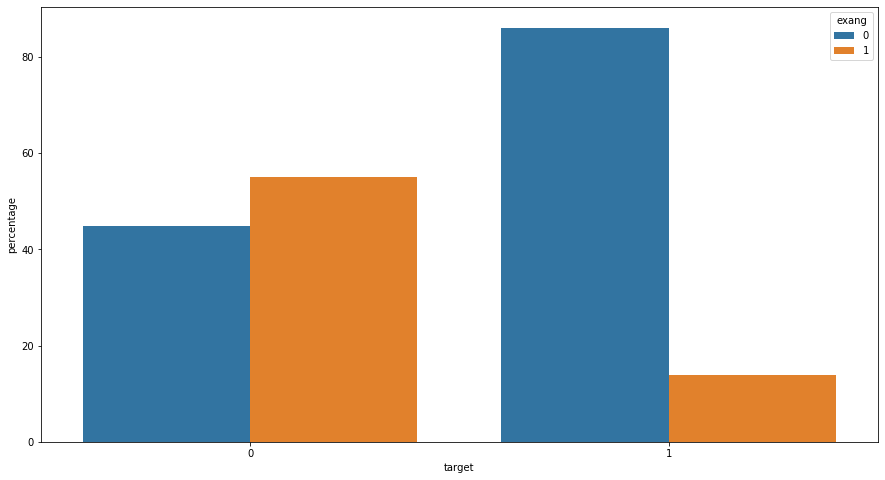

In [16]:
CountPlot('exang')

**Insights**  
1.patients who have exang seems to be least affected by heart disease  
2.patients who doesnt have exang are most affected by heart disease

## Understanding Outliers of Features

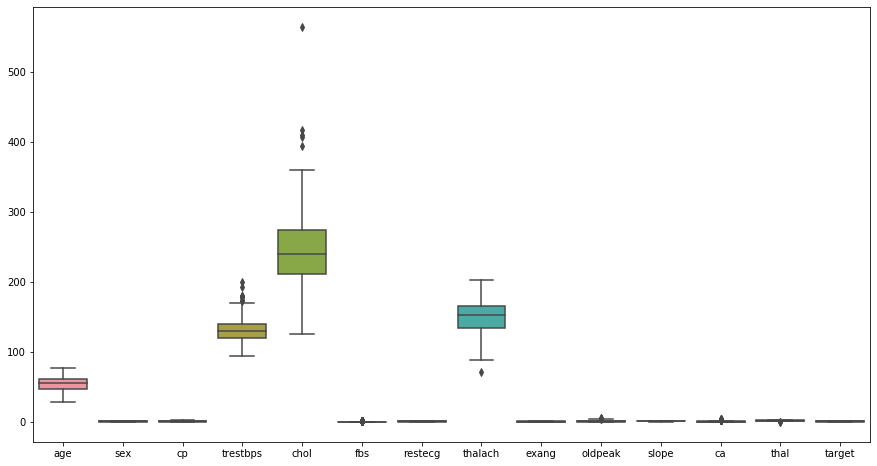

In [17]:
# Simplest ways to determine the outliers is to use a box plot 
sns.boxplot(data=heart_data)


**Insights**  
Resting blood pressure and Cholestrol features seems to have outliers.  
But we need to understand how the outliers of these features are effecting the Target variable 



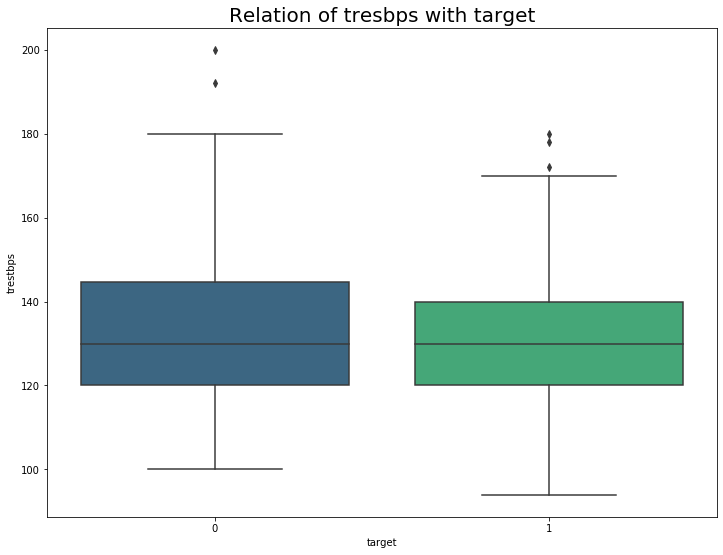

In [18]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(heart_data['target'], heart_data['trestbps'], palette = 'viridis')
plt.title('Relation of tresbps with target', fontsize = 20)
plt.show()

Resting Blood Pressure, The above Bivariate plot between tresbps(the resting blood pressure of a patient), and the target which says that whether the patient is suffering from the heart disease or not. The plot clearly suggests that the patients who are most likely to not suffer from the disease have a slighly greater blood pressure than the patients who have heart diseases.

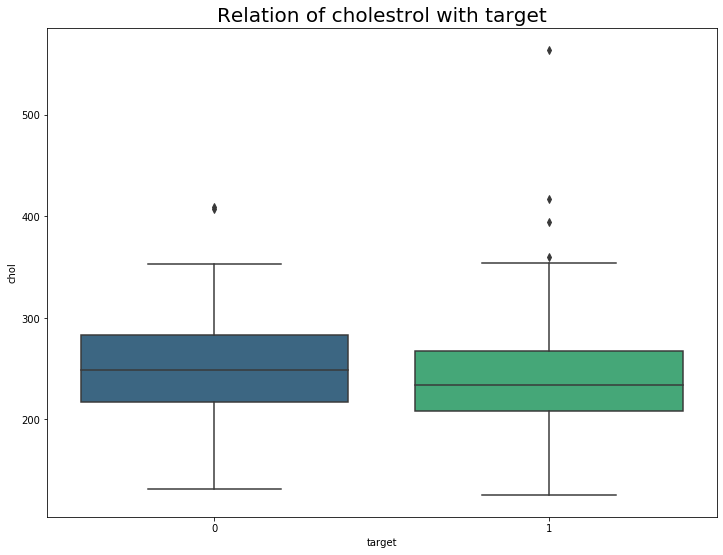

In [19]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(heart_data['target'], heart_data['chol'], palette = 'viridis')
plt.title('Relation of cholestrol with target', fontsize = 20)
plt.show()

The above Bivariate plot between cholestrol levels and target suggests that the Patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0(likely to not suffer from the heart diseases.

Hence, we can infer from the above plot that the cholestrol levels plays an important role in determining heart diseases. We all must keep our cholestrol levels in control as possible.

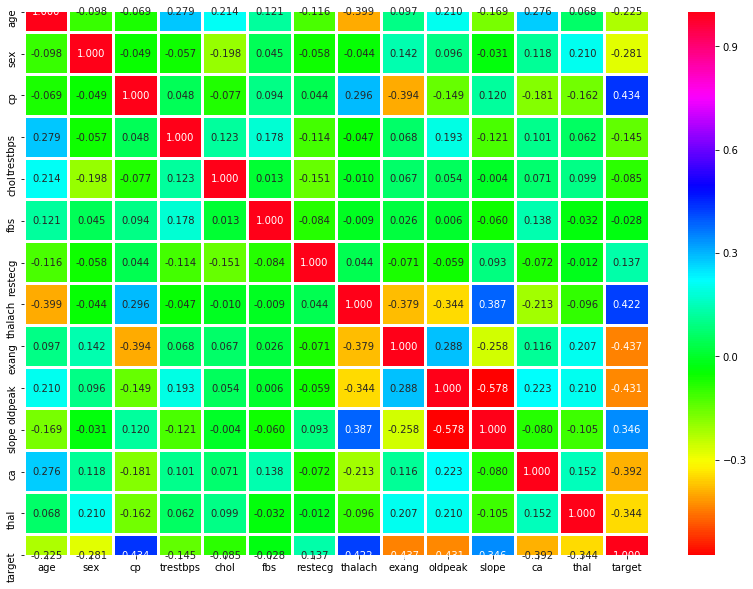

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(heart_data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

We can observe the that correlation of independent variables cholestrol,thalach,exang,oldpeak 

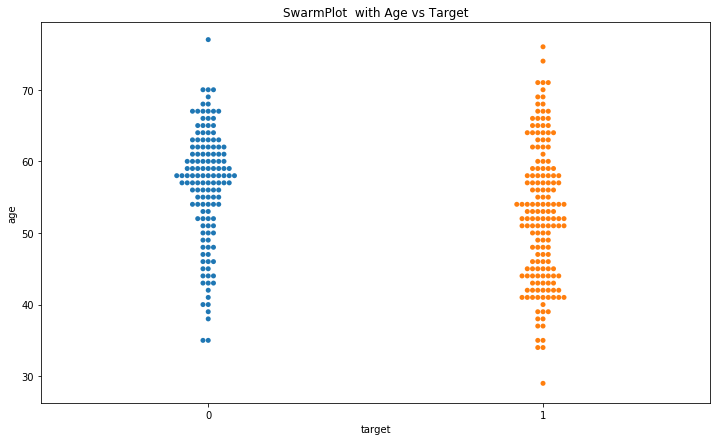

In [21]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.swarmplot(heart_data['target'],heart_data['age'])
plt.title('SwarmPlot  with Age vs Target')
plt.show()

## Machine Learning

As they are more categorical variables in the dataset let's first convert the categorical independent variable to type category.
There was a improvement in the model performance when type are converted to category (about 4% in logisitic regression model)


In [22]:
heart_data=heart_data.drop(heart_data[~(np.abs(stats.zscore(heart_data)) < 3).all(axis=1)].index)

In [23]:
heart_data.sex=heart_data.sex.astype('category')
heart_data.cp=heart_data.cp.astype('category')
heart_data.fbs=heart_data.fbs.astype('category')
heart_data.restecg=heart_data.restecg.astype('category')
heart_data.exang=heart_data.exang.astype('category')
heart_data.ca=heart_data.ca.astype('category')
heart_data.slope=heart_data.slope.astype('category')
heart_data.thal=heart_data.thal.astype('category')

### Creating Dummy Variables
Before applying any model, creating dummy variables of categorical attributes.Dummy variables are useful because they enable to use a single regression equation to represent multiple groups and also a single dummy variable contains a lot of information . Dummy variable converts categorical variable into k-1 new attributes(k is the levels of categorical attribute)

In [24]:
heart_data = pd.get_dummies(heart_data,drop_first=True)

The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

Machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed

StandardScaler from sci-kit-learn removes the mean and scales the data to unit variance. We can import StandardScalar method from scikit learn and apply it to our dataset.

In [25]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_data[columns_to_scale] = standardScaler.fit_transform(heart_data[columns_to_scale])

In [26]:
#creating model for logistic regression

y=heart_data['target']#dependent or output variable 
X=heart_data.drop('target',axis=1) # all independent variables
#X = pd.get_dummies(X,drop_first=True)
#splitting the data into train and test data 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (229, 20)
X_test (58, 20)
y_train (229,)
y_test (58,)


We will try to apply various Classification Machine learning Algorithms and will look ways to improve the model from their after  
The models are  
1.logistic regression  
2.support vector machine (SVM)  
3.k near neighborhood (kNN)  
4.RandomForestClassifier  
5.GaussianNB  
6.DecisionTreeClassifier algorithms

In [27]:
# Classification Models 
accuracy_scores =[]
confusion_matrices = []
classifiers =['Logisitic Regression','Support Vector Machine(SVM)','KNN','Random Forest','GaussianNB','Decision Tree']
models = [LogisticRegression(random_state=0),SVC(kernel='linear',random_state=0),
          KNeighborsClassifier(n_neighbors=2),
          RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0),
         GaussianNB(),DecisionTreeClassifier(criterion='entropy',random_state=0)]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    confusion_matrices.append(confusion_matrix(y_test,y_pred))
    
accuracy_model = pd.DataFrame(accuracy_scores,index=classifiers)
accuracy_model 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0
Logisitic Regression,0.913793
Support Vector Machine(SVM),0.879310
KNN,0.793103
Random Forest,0.827586
GaussianNB,0.862069
Decision Tree,0.689655


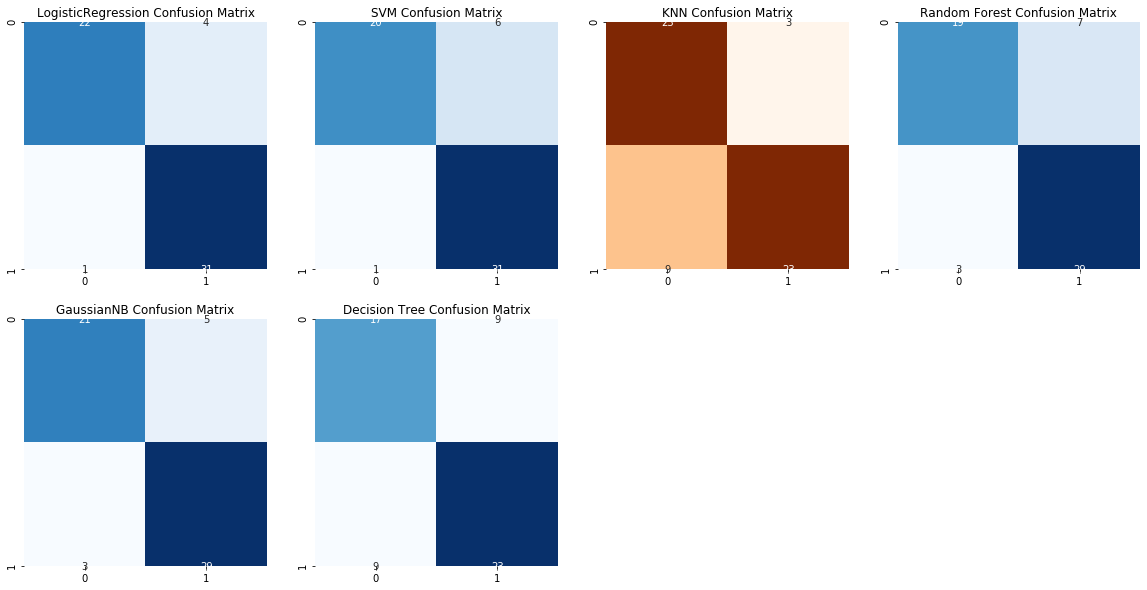

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("LogisticRegression Confusion Matrix")
sns.heatmap(confusion_matrices[0],annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,2)
plt.title("SVM Confusion Matrix")
sns.heatmap(confusion_matrices[1],annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,3)
plt.title("KNN Confusion Matrix")
sns.heatmap(confusion_matrices[2],annot=True,cmap="Oranges",fmt="d",cbar=False)
plt.subplot(2,4,4)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrices[3],annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,5)
plt.title("GaussianNB Confusion Matrix")
sns.heatmap(confusion_matrices[4],annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,6)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrices[5],annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

Scores have improved for KNN,Random Forest and decision Tree models after Standardizing the dataset

Logistic Regression is the pick of all the models .KNN performs the Least  
Lets do feature extraction by PCA in order to enhance the performance of the models by Dimensionality reduction

Let's work on individual models and try to improve the performance of the model

# Logistic Regression

[[22  4]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.89      0.97      0.93        32

    accuracy                           0.91        58
   macro avg       0.92      0.91      0.91        58
weighted avg       0.92      0.91      0.91        58



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


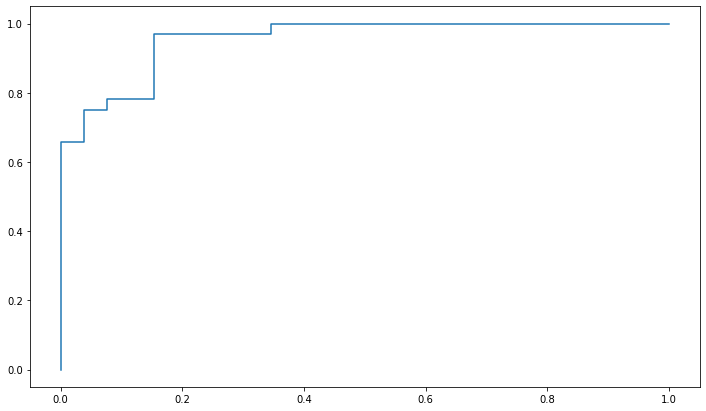

In [29]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
cf = confusion_matrix(y_test,y_pred)
print(cf)
print(classification_report(y_test,y_pred))
y_pred_proba =lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve')

In [30]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(class_weight='balanced',random_state=42)
param_grid = { 
    'C': [0.1,0.2,0.3,0.4],
    'penalty': ['l1', 'l2'],
    'class_weight':[{0: 1, 1: 1},{ 0:0.67, 1:0.33 },{ 0:0.75, 1:0.25 },{ 0:0.8, 1:0.2 }]}
CV_rfc = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432:

{'C': 0.2, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2'}

In [31]:
#fitting the model
lr1=LogisticRegression(C=0.2,random_state=42,penalty='l1',class_weight={0:1,1:1})
lr1.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.2, class_weight={0: 1, 1: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred1=lr1.predict(X_test)
print("Logistic Test score with ",format(accuracy_score(y_test,y_pred1)))

Logistic Test score with  0.8448275862068966


# KNN Prediction

Text(0, 0.5, 'Accuracy Scores')

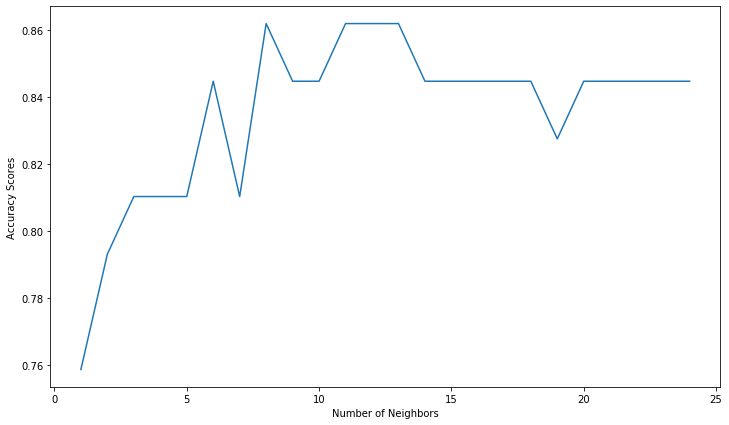

In [36]:
neighbors = range(1,25)
neighbors_accuracy_scores =[]
neighbors_accuracy_scores_train =[]

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    neighbors_accuracy_scores.append(accuracy_score(y_test,y_pred))
    
plt.plot(neighbors,neighbors_accuracy_scores)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Scores")

The Highest accuracy attained for KNN is with neighbors parameters 8 with accuracy score 0.86